# tf.data

<b> 기존의 placeholder & feed_dict 방법보다 높은 성능 (속도 측면)  
<b> 간단한 batch, epoch, shuffle, map 구현  
<b> tf.estimator 와 같이 사용하기에 적합  


In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


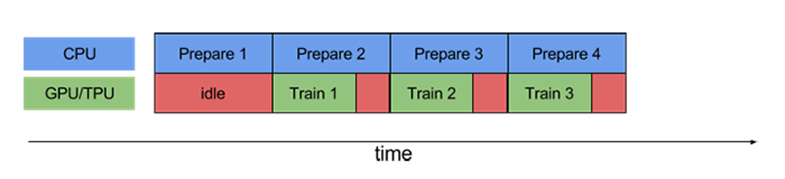

In [0]:
from IPython.display import Image
Image('/content/gdrive/My Drive/Colab Notebooks/Images/data_time.png', width=600, height=200)

### 긍정/부정 Make data (긍정: 1, 부정: 0)

In [0]:
sample = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

label =[[1], [0], [1], [1], [0], [1]]

### load need modules

In [0]:
import os
import tensorflow as tf
import numpy as np

from tensorflow.keras import preprocessing

###Data Preprocessing

In [3]:
tokenizer = preprocessing.text.Tokenizer() 
tokenizer.fit_on_texts(sample) 
sequence = tokenizer.texts_to_sequences(sample) 

print("index text data : \n", sequence)
print(np.array(sequence).shape)

index text data : 
 [[4, 1, 5, 6], [7, 1, 8, 9], [10, 2, 3, 11], [12, 2, 3, 13], [14, 1, 15, 16], [17, 18, 19, 20]]
(6, 4)


In [4]:
word_index = tokenizer.word_index

print("index of each word : \n", word_index)

index of each word : 
 {'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [5]:
print("label : ", label)
print(np.array(label).shape) # np 지원 api shape

label :  [[1], [0], [1], [1], [0], [1]]
(6, 1)


###  tf.data data processing


In [0]:
tf.data.Dataset.from_gener

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((sequence, label))
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

### Session run

In [7]:
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

(array([4, 1, 5, 6], dtype=int32), array([1], dtype=int32))
(array([7, 1, 8, 9], dtype=int32), array([0], dtype=int32))
(array([10,  2,  3, 11], dtype=int32), array([1], dtype=int32))
(array([12,  2,  3, 13], dtype=int32), array([1], dtype=int32))
(array([14,  1, 15, 16], dtype=int32), array([0], dtype=int32))
(array([17, 18, 19, 20], dtype=int32), array([1], dtype=int32))


### shuffle data

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((sequence, label))
dataset = dataset.shuffle(len(sequence))
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

In [11]:
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

(array([10,  2,  3, 11], dtype=int32), array([1], dtype=int32))
(array([14,  1, 15, 16], dtype=int32), array([0], dtype=int32))
(array([17, 18, 19, 20], dtype=int32), array([1], dtype=int32))
(array([7, 1, 8, 9], dtype=int32), array([0], dtype=int32))
(array([12,  2,  3, 13], dtype=int32), array([1], dtype=int32))
(array([4, 1, 5, 6], dtype=int32), array([1], dtype=int32))


### make batch

In [0]:
BATCH_SIZE = 2

dataset = tf.data.Dataset.from_tensor_slices((sequence, label))
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.shuffle(len(sequence))
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

In [15]:
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

(array([[4, 1, 5, 6],
       [7, 1, 8, 9]], dtype=int32), array([[1],
       [0]], dtype=int32))
(array([[14,  1, 15, 16],
       [17, 18, 19, 20]], dtype=int32), array([[0],
       [1]], dtype=int32))
(array([[10,  2,  3, 11],
       [12,  2,  3, 13]], dtype=int32), array([[1],
       [1]], dtype=int32))


### 2 epoch

In [0]:
BATCH_SIZE = 2
EPOCH_SIZE = 2

dataset = tf.data.Dataset.from_tensor_slices((sequence, label))
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.shuffle(len(sequence))
dataset = dataset.repeat(EPOCH_SIZE)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

In [17]:
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

(array([[10,  2,  3, 11],
       [12,  2,  3, 13]], dtype=int32), array([[1],
       [1]], dtype=int32))
(array([[4, 1, 5, 6],
       [7, 1, 8, 9]], dtype=int32), array([[1],
       [0]], dtype=int32))
(array([[14,  1, 15, 16],
       [17, 18, 19, 20]], dtype=int32), array([[0],
       [1]], dtype=int32))
(array([[14,  1, 15, 16],
       [17, 18, 19, 20]], dtype=int32), array([[0],
       [1]], dtype=int32))
(array([[10,  2,  3, 11],
       [12,  2,  3, 13]], dtype=int32), array([[1],
       [1]], dtype=int32))
(array([[4, 1, 5, 6],
       [7, 1, 8, 9]], dtype=int32), array([[1],
       [0]], dtype=int32))


### use map 

In [0]:
def map_fn(X, Y=None):
  input = {'x': X}
  label = Y
  return input, label

dataset = tf.data.Dataset.from_tensor_slices((sequence, label))
dataset = dataset.map(map_fn)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

In [19]:
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

({'x': array([4, 1, 5, 6], dtype=int32)}, array([1], dtype=int32))
({'x': array([7, 1, 8, 9], dtype=int32)}, array([0], dtype=int32))
({'x': array([10,  2,  3, 11], dtype=int32)}, array([1], dtype=int32))
({'x': array([12,  2,  3, 13], dtype=int32)}, array([1], dtype=int32))
({'x': array([14,  1, 15, 16], dtype=int32)}, array([0], dtype=int32))
({'x': array([17, 18, 19, 20], dtype=int32)}, array([1], dtype=int32))


### use map  two variable

In [0]:
def map_fn(X1, X2, Y=None):
  input = {'x1': X1, 'x2': X2}
  label = Y
  return input, label


dataset = tf.data.Dataset.from_tensor_slices((sequence, sequence, label))
dataset = dataset.map(map_fn)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

In [21]:
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

({'x1': array([4, 1, 5, 6], dtype=int32), 'x2': array([4, 1, 5, 6], dtype=int32)}, array([1], dtype=int32))
({'x1': array([7, 1, 8, 9], dtype=int32), 'x2': array([7, 1, 8, 9], dtype=int32)}, array([0], dtype=int32))
({'x1': array([10,  2,  3, 11], dtype=int32), 'x2': array([10,  2,  3, 11], dtype=int32)}, array([1], dtype=int32))
({'x1': array([12,  2,  3, 13], dtype=int32), 'x2': array([12,  2,  3, 13], dtype=int32)}, array([1], dtype=int32))
({'x1': array([14,  1, 15, 16], dtype=int32), 'x2': array([14,  1, 15, 16], dtype=int32)}, array([0], dtype=int32))
({'x1': array([17, 18, 19, 20], dtype=int32), 'x2': array([17, 18, 19, 20], dtype=int32)}, array([1], dtype=int32))


### Create All Feature (batch, shuffle, repeat, map)

In [0]:
BATCH_SIZE = 2
EPOCH_SIZE = 2

#############################################################
# 지금까지 배운 API들을 사용해 본다. 
# 1. 주어진 데이터를 tf.data에 적용시킨다.
# 2. map 사용한다.
# 3. 배치 크기 만큼 가져온다.
# 4. 순서를 섞어준다.
# 5. 전체 데이터를 EPOCH SIZE 만큼 사용한다.
# 6. 데이터를 하나씩 사용한다.
# 7. iterator의 get_next를 통해 하나씩 가져오는 구조를 만든다.
# 8. 세션을 구성해서 실행한다.
#############################################################

In [0]:
# ANSWER
BATCH_SIZE = 2
EPOCH_SIZE = 2

def map_fn(X, Y=None):
  inputs = {'x': X}
  label = Y
  return inputs, label

dataset = tf.data.Dataset.from_tensor_slices((sequence, label))
dataset = dataset.map(map_fn)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.shuffle(len(sequence))
dataset = dataset.repeat(EPOCH_SIZE)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

In [0]:
# ANSWER
with tf.Session() as sess:
  while True:
    try:
      print(sess.run(next_data))
    except tf.errors.OutOfRangeError:
      break

({'x': array([[4, 1, 5, 6],
       [7, 1, 8, 9]], dtype=int32)}, array([[1],
       [0]], dtype=int32))
({'x': array([[14,  1, 15, 16],
       [17, 18, 19, 20]], dtype=int32)}, array([[0],
       [1]], dtype=int32))
({'x': array([[10,  2,  3, 11],
       [12,  2,  3, 13]], dtype=int32)}, array([[1],
       [1]], dtype=int32))
({'x': array([[4, 1, 5, 6],
       [7, 1, 8, 9]], dtype=int32)}, array([[1],
       [0]], dtype=int32))
({'x': array([[10,  2,  3, 11],
       [12,  2,  3, 13]], dtype=int32)}, array([[1],
       [1]], dtype=int32))
({'x': array([[14,  1, 15, 16],
       [17, 18, 19, 20]], dtype=int32)}, array([[0],
       [1]], dtype=int32))
